In [1]:
import torch
import torch.nn as nn

In [2]:
# Sentence = Your journey starts with one step
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

### Simplified Self Attention

In [3]:
# Step -1 : Computing w: Attention Scores
# Lets pick "journey" as the query here.
query = inputs[1]

In [10]:
print('query:', query)
print('-'*50)
print('inputs:', inputs)

query: tensor([0.5500, 0.8700, 0.6600])
--------------------------------------------------
inputs: tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])


In [5]:
attn_scores_2 = torch.empty(inputs.shape[0])
attn_scores_2

tensor([0., 0., 0., 0., 0., 0.])

In [11]:
# Calculating attention with one another
for i, x_i in enumerate(inputs):
    print(x_i)
    attn_scores_2[i] = x_i @ query

tensor([0.4300, 0.1500, 0.8900])
tensor([0.5500, 0.8700, 0.6600])
tensor([0.5700, 0.8500, 0.6400])
tensor([0.2200, 0.5800, 0.3300])
tensor([0.7700, 0.2500, 0.1000])
tensor([0.0500, 0.8000, 0.5500])


In [12]:
attn_scores_2

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

In [13]:
# Normalizing the Attention Scores
attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()
attn_weights_2_tmp

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])

Here is the formula for Softmax Function
$$
 \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} 
$$
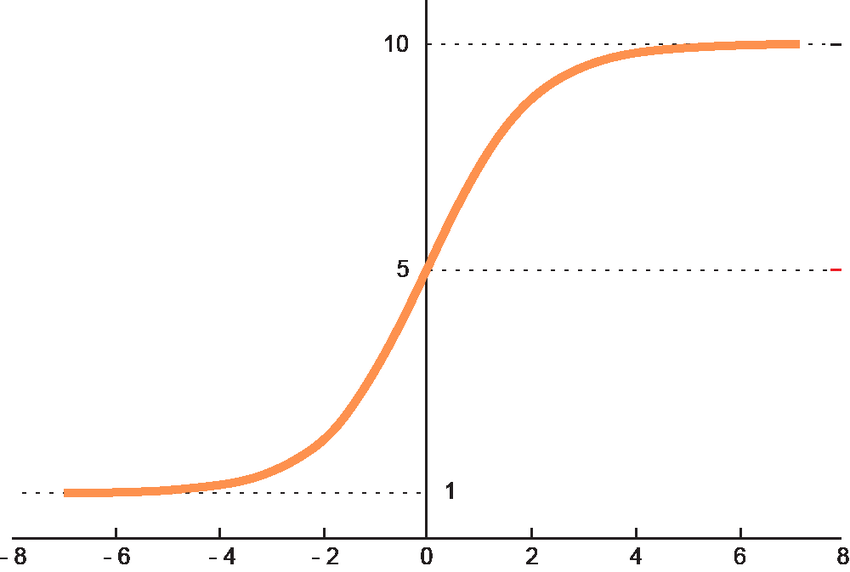

In [14]:
# Better method to normalize- Use Softmax
def softmax_naive(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)
attn_weights_2_naive

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [15]:
# Using Pytorch Softmax
attn_weights_2 = torch.softmax(attn_scores_2, dim= 0)
attn_weights_2

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [16]:
print("Inputs:")
print(inputs)

print("\nQuery:")
print(query)

print("\nAttention Weights 2 After normalizations:")
print(attn_weights_2)

Inputs:
tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

Query:
tensor([0.5500, 0.8700, 0.6600])

Attention Weights 2 After normalizations:
tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])


In [17]:
context_vec_2 = torch.zeros(query.shape)
context_vec_2

tensor([0., 0., 0.])

We just computed the attention weights for the input vector [1] that is the word- 'journey' in our sentence. The goal is to compute a context vector for each input element that combines info from all the other elements

In [18]:
# Normalized attention scores
attn_weights_2

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [19]:
for i, x_i in enumerate(inputs):
    print(f'attn_weights_2 - {i}th index : ',attn_weights_2[i])
    print(f'input - {i}: ',x_i)
    context_vec_2 += attn_weights_2[i]*x_i
    print('context vector',context_vec_2)
    print('-------------------------')

attn_weights_2 - 0th index :  tensor(0.1385)
input - 0:  tensor([0.4300, 0.1500, 0.8900])
context vector tensor([0.0596, 0.0208, 0.1233])
-------------------------
attn_weights_2 - 1th index :  tensor(0.2379)
input - 1:  tensor([0.5500, 0.8700, 0.6600])
context vector tensor([0.1904, 0.2277, 0.2803])
-------------------------
attn_weights_2 - 2th index :  tensor(0.2333)
input - 2:  tensor([0.5700, 0.8500, 0.6400])
context vector tensor([0.3234, 0.4260, 0.4296])
-------------------------
attn_weights_2 - 3th index :  tensor(0.1240)
input - 3:  tensor([0.2200, 0.5800, 0.3300])
context vector tensor([0.3507, 0.4979, 0.4705])
-------------------------
attn_weights_2 - 4th index :  tensor(0.1082)
input - 4:  tensor([0.7700, 0.2500, 0.1000])
context vector tensor([0.4340, 0.5250, 0.4813])
-------------------------
attn_weights_2 - 5th index :  tensor(0.1581)
input - 5:  tensor([0.0500, 0.8000, 0.5500])
context vector tensor([0.4419, 0.6515, 0.5683])
-------------------------


#### Summary
1. Find the attention weight (w) of one vector w.r.t every vector in the input sequence. This is : query @ input
2. Normalize attention weights of that vector using softmax
3. Multiply the weight with the input query vector and get the sum to get the final Context vector for the input vector 2.

In [21]:
context_vec_2

tensor([0.4419, 0.6515, 0.5683])

#### Computing Attention Weights for all input tokens

In [22]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [23]:
attn_scores = torch.empty(6,6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i,j] = torch.dot(x_i,x_j)
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [25]:
# Step 1: Using Matrix Multiplication. Finding attention scores of each input with itself
attn_scores = inputs @ inputs.T
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [26]:
# Step 2: Normalization
attn_weights = torch.softmax(attn_scores, dim = 1)
attn_weights

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [29]:
attn_weights.sum(dim = 1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [30]:
# Step 3: Finding Context vectors
all_context_vectors = attn_weights @ inputs
all_context_vectors

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

In [31]:
print('Previous Second vector', context_vec_2)

Previous Second vector tensor([0.4419, 0.6515, 0.5683])


### Self Attention - aka. Scaled Dot Product Attention

In [38]:
x_2 = inputs[2]
d_in = inputs.shape[1]
d_out = 2
print(x_2, d_in, d_out)

tensor([0.5700, 0.8500, 0.6400]) 3 2


In [36]:
# Innitialization 3 Weight matrices
torch.manual_seed(123)
W_query  = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)
W_key  = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)
W_value  = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)

In [37]:
W_query, W_key, W_value

(Parameter containing:
 tensor([[0.2961, 0.5166],
         [0.2517, 0.6886],
         [0.0740, 0.8665]]),
 Parameter containing:
 tensor([[0.1366, 0.1025],
         [0.1841, 0.7264],
         [0.3153, 0.6871]]),
 Parameter containing:
 tensor([[0.0756, 0.1966],
         [0.3164, 0.4017],
         [0.1186, 0.8274]]))

In [41]:
inputs, x_2

(tensor([[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]),
 tensor([0.5700, 0.8500, 0.6400]))

In [53]:
query_2 = x_2 @ W_query
print('query_2- ', query_2)
key_2 = x_2 @ W_key
print('key_2- ', key_2)
value_2 = x_2 @ W_value
print('value_2- ', value_2)

query_2-  tensor([0.4300, 1.4343])
key_2-  tensor([0.4361, 1.1156])
value_2-  tensor([0.3879, 0.9831])


In [42]:
# Projecting the input tokens into a 6,2 embedding space
keys = inputs@ W_key
values = inputs @ W_value
keys, values

(tensor([[0.3669, 0.7646],
         [0.4433, 1.1419],
         [0.4361, 1.1156],
         [0.2408, 0.6706],
         [0.1827, 0.3292],
         [0.3275, 0.9642]]),
 tensor([[0.1855, 0.8812],
         [0.3951, 1.0037],
         [0.3879, 0.9831],
         [0.2393, 0.5493],
         [0.1492, 0.3346],
         [0.3221, 0.7863]]))

In [55]:
query_2

tensor([0.4300, 1.4343])

In [56]:
# Attention Score - inputs dot product w/ query. Not directly doing it with the input
# In simplified self attention : attn_scores_2[i] = x_i @ query
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8284)


In [58]:
attn_scores_22 = query_2 @ keys.T
attn_scores_22

tensor([1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238])

In [59]:
# Step -2 Normalizing. Here instead of just softmax, we scale the attention scores by dividing them by Square root of the
# Embedding dimension of the keys
d_k = keys.shape[1]
attn_weights_2 = torch.softmax(attn_scores_22/d_k**0.5, dim =-1)
print(attn_weights_2)

tensor([0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819])


In [60]:
# Step - 3 : Do a dot product with the Value matrix. To get the alignment
context_vec_2= attn_weights_2 @ values
print(context_vec_2)

tensor([0.3058, 0.8203])


### Self Attention Class

In [43]:
class SelfAttention_V1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.d_in = d_in
        self.d_out = d_out
        self.W_query = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)
        self.W_key = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)
        self.W_value = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)

    def forward(self,x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1] ** 0.5, dim = -1)
        context_vec = attn_weights @ values
        return context_vec

In [50]:
W_query = torch.nn.Parameter(torch.rand(3,2))
W_query

Parameter containing:
tensor([[0.3821, 0.6605],
        [0.8536, 0.5932],
        [0.6367, 0.9826]], requires_grad=True)

In [47]:
help(torch.nn.Parameter)

Help on class Parameter in module torch.nn.parameter:

class Parameter(torch.Tensor)
 |  Parameter(data=None, requires_grad=True)
 |  
 |  A kind of Tensor that is to be considered a module parameter.
 |  
 |  Parameters are :class:`~torch.Tensor` subclasses, that have a
 |  very special property when used with :class:`Module` s - when they're
 |  assigned as Module attributes they are automatically added to the list of
 |  its parameters, and will appear e.g. in :meth:`~Module.parameters` iterator.
 |  Assigning a Tensor doesn't have such effect. This is because one might
 |  want to cache some temporary state, like last hidden state of the RNN, in
 |  the model. If there was no such class as :class:`Parameter`, these
 |  temporaries would get registered too.
 |  
 |  Args:
 |      data (Tensor): parameter tensor.
 |      requires_grad (bool, optional): if the parameter requires gradient. Note that
 |          the torch.no_grad() context does NOT affect the default behavior of
 |     

In [51]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [52]:
torch.manual_seed(123)
d_in , d_out = 3,2
sa_v1 = SelfAttention_V1(d_in, d_out)
context_vec = sa_v1.forward(inputs)
context_vec

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])

In [54]:
class SelfAttention_V2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__()
        self.d_in = d_in
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)

    def forward(self,x):
        # Here, we do internal dot product and bias additon as our Weights are ininitalized by nn.Linear.
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1] ** 0.5, dim = -1)
        context_vec = attn_weights @ values
        return context_vec

In [55]:
torch.manual_seed(123)
d_in , d_out = 3,2
sa_v2 = SelfAttention_V2(d_in, d_out)
context_vec = sa_v2.forward(inputs)
context_vec

tensor([[-0.5337, -0.1051],
        [-0.5323, -0.1080],
        [-0.5323, -0.1079],
        [-0.5297, -0.1076],
        [-0.5311, -0.1066],
        [-0.5299, -0.1081]], grad_fn=<MmBackward0>)

### Causal Attention

In [56]:
# We mask out the future tokens , so LLM can't access the future tokens when computing the context vectors
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores= queries @ keys.T
attn_scores

tensor([[0.3111, 0.3479, 0.3471, 0.1714, 0.2350, 0.1928],
        [0.1655, 0.2602, 0.2576, 0.1445, 0.1384, 0.1790],
        [0.1667, 0.2602, 0.2577, 0.1443, 0.1391, 0.1784],
        [0.0510, 0.1080, 0.1064, 0.0643, 0.0476, 0.0835],
        [0.1415, 0.1875, 0.1863, 0.0987, 0.1121, 0.1174],
        [0.0476, 0.1192, 0.1171, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MmBackward0>)

In [58]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length,context_length))
mask_simple

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])

In [59]:
context_length

6

In [60]:
masked_simple = attn_scores* mask_simple
masked_simple

tensor([[0.3111, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1655, 0.2602, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.2602, 0.2577, 0.0000, 0.0000, 0.0000],
        [0.0510, 0.1080, 0.1064, 0.0643, 0.0000, 0.0000],
        [0.1415, 0.1875, 0.1863, 0.0987, 0.1121, 0.0000],
        [0.0476, 0.1192, 0.1171, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MulBackward0>)

In [61]:
# Normalizing
rows_sum = masked_simple.sum(dim = 1, keepdim = True)
masked_simple_norm = masked_simple/rows_sum
masked_simple_norm

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3888, 0.6112, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2435, 0.3801, 0.3764, 0.0000, 0.0000, 0.0000],
        [0.1547, 0.3275, 0.3227, 0.1950, 0.0000, 0.0000],
        [0.1949, 0.2582, 0.2565, 0.1360, 0.1544, 0.0000],
        [0.0950, 0.2377, 0.2337, 0.1458, 0.0952, 0.1927]],
       grad_fn=<DivBackward0>)

In [62]:
# We normalize the scores again to remove any information leakage
# Trick for a faster normalization
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
masked

tensor([[0.3111,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.1655, 0.2602,   -inf,   -inf,   -inf,   -inf],
        [0.1667, 0.2602, 0.2577,   -inf,   -inf,   -inf],
        [0.0510, 0.1080, 0.1064, 0.0643,   -inf,   -inf],
        [0.1415, 0.1875, 0.1863, 0.0987, 0.1121,   -inf],
        [0.0476, 0.1192, 0.1171, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MaskedFillBackward0>)

In [63]:
attn_weights = torch.softmax(masked/keys.shape[1]**0.5,dim = 1)
attn_weights

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3190, 0.3408, 0.3402, 0.0000, 0.0000, 0.0000],
        [0.2445, 0.2545, 0.2542, 0.2468, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2058, 0.1935, 0.1953, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<SoftmaxBackward0>)

#### Dropout

In [64]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6,6)
dropout(example)

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])

In [65]:
dropout(attn_weights)

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.6816, 0.6804, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5085, 0.4936, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3906, 0.0000],
        [0.3249, 0.3418, 0.0000, 0.3308, 0.3249, 0.3363]],
       grad_fn=<MulBackward0>)

### Implementing a compact Causal Attention Class

In [66]:
batch= torch.stack((inputs, inputs), dim = 0)
batch.shape

torch.Size([2, 6, 3])

In [67]:
batch

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

In [68]:
d_in , d_out = 3,2
context_length = 6

- torch.triu() generates this “upper triangle” matrix.
- In causal attention, a token at position  t  should only attend to tokens at positions  \leq t . This mask ensures that attention scores for “future” tokens are invalidated (set to -\infty, which softmax turns into 0 probability).

### Summary of Causal Attention
The causal attention mask (applied with masked_fill_) ensures that a token in the sequence can only attend to itself and past tokens, not future ones. Here’s the big picture:
- Mask: Prevents “future” tokens from contributing to attention weights.
- Masked Scores: Invalid positions are set to -\infty, making their softmax probabilities zero.
- Causal Attention: This is critical in tasks like language modeling, where each token must predict the next one without cheating by looking ahead.

In [73]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_in = d_in
        self.d_out = d_out
        self.context_length = context_length
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length,context_length), diagonal = 1))

    def forward(self,x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores= queries @ keys.transpose(1,2)
        # This returns a boolean self.mask.bool()
        attn_scores.masked_fill_(  # New, _ ops are in-place
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)  # `:num_tokens` to account for cases where the number of tokens in the batch is smaller than the supported context_size
        
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights)
        context_vec = attn_weights @ values
        return context_vec

In [74]:
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0)
context_vecs = ca(batch)

In [75]:
batch

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

In [76]:
context_vecs

tensor([[[-0.7114,  0.0763],
         [-0.7941,  0.2408],
         [-0.8164,  0.2863],
         [-0.7279,  0.2841],
         [-0.6679,  0.2206],
         [-0.6610,  0.2659]],

        [[-0.7114,  0.0763],
         [-0.7941,  0.2408],
         [-0.8164,  0.2863],
         [-0.7279,  0.2841],
         [-0.6679,  0.2206],
         [-0.6610,  0.2659]]], grad_fn=<UnsafeViewBackward0>)

In [77]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) 
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)


In [78]:
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0, num_heads=2
)

In [79]:
context_vect= mha(batch)
context_vect

tensor([[[-0.2350, -0.4229,  0.1336, -0.2467],
         [ 0.0172, -0.3212,  0.0770, -0.1985],
         [ 0.0926, -0.2919,  0.0557, -0.1849],
         [ 0.1041, -0.2457,  0.0442, -0.1465],
         [ 0.1292, -0.2372,  0.0137, -0.1668],
         [ 0.1297, -0.2104,  0.0236, -0.1339]],

        [[-0.2350, -0.4229,  0.1336, -0.2467],
         [ 0.0172, -0.3212,  0.0770, -0.1985],
         [ 0.0926, -0.2919,  0.0557, -0.1849],
         [ 0.1041, -0.2457,  0.0442, -0.1465],
         [ 0.1292, -0.2372,  0.0137, -0.1668],
         [ 0.1297, -0.2104,  0.0236, -0.1339]]], grad_fn=<CatBackward0>)

## Multi Head Attention

In [53]:
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
                    [0.8993, 0.0390, 0.9268, 0.7388],
                    [0.7179, 0.7058, 0.9156, 0.4340]],

                   [[0.0772, 0.3565, 0.1479, 0.5331],
                    [0.4066, 0.2318, 0.4545, 0.9737],
                    [0.4606, 0.5159, 0.4220, 0.5786]]]])

In [55]:
a.shape

torch.Size([1, 2, 3, 4])

In [65]:
calc = a @ a.transpose(2,3)
calc

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])